# Railgun train

### Skrevet av Fridtjof Gjengset og Isak Kvanneid

I denne oppgaven har vi tatt konseptet av en railgun og anvendt det for å se på hvor mye energi som kreves for å akselerere ett t-bane med en gitt akselerasjon opp til en gitt hastighet. Vi skal se om dette er en effektiv måte å akselerere et t-bane på og sammenligne det med tradisjonelle t-baner. 


Koden er skrevet som en funksjon railgun(distance,speed,acceleration,mass), slik at vi lett kan endre på relevante variable som akselerasjon, fart, avstand og masse. Funksjonen lager flere lister som inneholder posisjon, tid, fart, akselerasjon og strøm, som funksjonen deretter retunrnerer. Dette er gjort slik at vi rask kan endre det vi ønsker å plotte uten å kjøre hele funksjonen på nytt igjen. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def railgun(distance,speed,acceleration,mass):
	D = 3 #separation of the rails and width of the cart. Set to 3m
	w = 0.2 #width of the rails. Set to 20cm each
	L = distance #length of the rails.
	m = mass #defines mass
	fric = 0.001
	dt=.00001 #initial timestep 0.00001s
	Muover2pi = 2e-7 #magnetic constant


	barpos = 0 #initial position of bar
	v=0 #initial velocity set to 0
	t=0 #initial time
	I = 0 #starting current. Set to 0 Amps
	a_tol = acceleration*0.01 #acceleration tolerance


	Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2)) - fric*m*9.81#initial force
	a = Fnet/m #initial acceleration

	v_list = [float(v)]#defines lists with initial values
	t_list = [float(t)]
	barpos_list =[float(barpos)]
	I_list = [float(I)]
	a_list = [float(a)]

	while barpos < L: #while the desired distance is less than current distance
		Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2)) - fric*m*9.81#Based on our calculated expression for the force on the bar minus frictional force
		a = Fnet/m #calculated acceleration based on Fnet

		while a-a_tol>acceleration and v<speed: #while a is too big adjusts current
			I = I - 1#adjusts current down
			Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2)) - fric*m*9.81#finds new force
			a = Fnet/m #finds acceleration

		while a+a_tol<acceleration and v<speed: #while a is too small adjusts current
			I = I + 1#adjusts current up
			Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2)) - fric*m*9.81 #new force
			a = Fnet/m #finds acceleration

		if v>speed: 
			while Fnet>0: #calculates I to get Fnet=0
				I = I - 1
				Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2)) - fric*m*9.81

		v = v + a*dt #Update the velocity
		barpos = barpos + v*dt #Use velocity to update position

		t = t+dt#add to total time
		barpos_list.append(float(barpos)) #updates all lists
		v_list.append(float(v))
		t_list.append(float(t))
		I_list.append(float(I))
		a_list.append(float(a))
    
	return([barpos_list,v_list,t_list,I_list,a_list]) #returns complete lists




In [3]:
[barpos_list,v_list,t_list,I_list,a_list]=railgun(100,11,1.3,125*10**3) #distance,speed,acceleration,mass



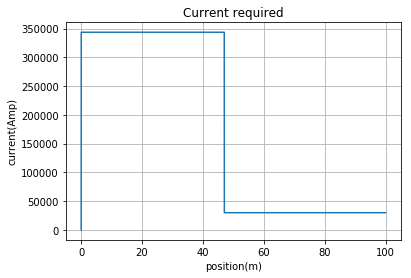

In [4]:

plt.plot(barpos_list,I_list)
plt.grid(True)
plt.title("Current required")
plt.xlabel('position(m)')
plt.ylabel('current(Amp)')




plt.show()

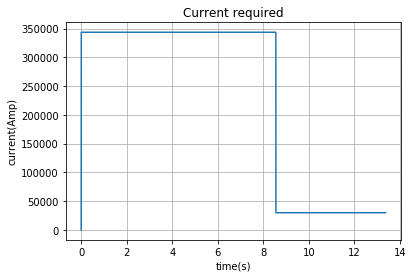

In [5]:

plt.plot(t_list,I_list)
plt.grid(True)
plt.title("Current required")
plt.xlabel('time(s)')
plt.ylabel('current(Amp)')




plt.show()

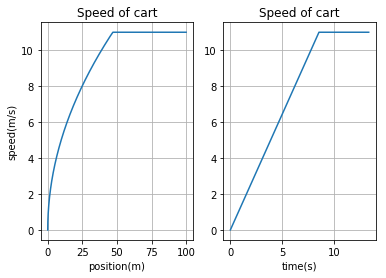

In [6]:



plt.subplot(1,2,1)
plt.plot(barpos_list,v_list)
plt.grid(True)
plt.title("Speed of cart")
plt.xlabel('position(m)')
plt.ylabel('speed(m/s)')

plt.subplot(1,2,2)
plt.plot(t_list,v_list)
plt.grid(True)
plt.title("Speed of cart")
plt.xlabel('time(s)')

plt.show()

I følge den engelse wiki siden om de norske tbanene bruker et fullastet togsett omtret 5000amper for å akslerere fra 0 til 40 $\frac{km}{t}$. Vårt tog bruker 300 KAmp for å akselerere med 1.3 $\frac{m}{s^2}$ til samme fatren. Med andre ord er ikke elekromagnetisme beste måten å akselerere et tog.


In [7]:
[barpos_list,v_list,t_list,I_list,a_list]=railgun(10,400,10000,10)

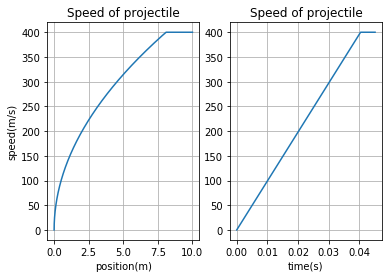

In [8]:
plt.subplot(1,2,1)
plt.plot(barpos_list,v_list)
plt.grid(True)
plt.title("Speed of projectile")
plt.xlabel('position(m)')
plt.ylabel('speed(m/s)')

plt.subplot(1,2,2)
plt.plot(t_list,v_list)
plt.grid(True)
plt.title("Speed of projectile")
plt.xlabel('time(s)')

plt.show()

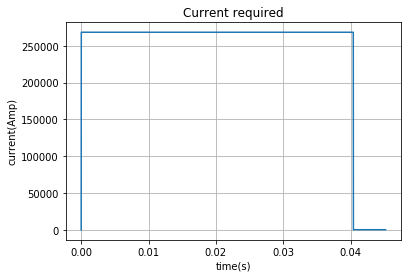

In [9]:


plt.plot(t_list,I_list)
plt.grid(True)
plt.title("Current required")
plt.xlabel('time(s)')
plt.ylabel('current(Amp)')




plt.show()

Selvom vår oppgave nå er spesielt anvendt for tog og ikke mindre prosjektiler så kan vi sammenligne svarene vi får hvis vi bruker det samme programmet. Hvis vi akselerere et 10kg prosjektil til 400$\frac{m}{s}$ med en akselerasjon på 10000$\frac{m}{s^2}$ over 10m så trekkes en strøm på 250 kAmp over et tidsintervall på 0.04s. Hvis vi sammenligner dette med resultatet vi fikk for toget hvor akselerasjonen krevde en strøm på omtrent 350 kAmp over et tidsintervall på litt over 8s så trekker toget ekstremt mye mer strøm. 


Etter å ha sammenlignet svarene så kan vi se at å akselerere et tog ved hjelp av en railgun krever veldig mye energi i forhold til hva et vanelig tog vil trenge. Hvis vi prøver å sammenligne med en mindre masse så krever det åpenbart mindre energi, men det kan ha andre praktiske anvendelser hvor det faktisk kan lønne seg å bruke en railgun.

Kilder:

Akselerasjon: https://www.tu.no/artikler/bremseenergi-fra-t-banen/326295
specs: http://vognselskapet.no/v%C3%A5rt-materiell/mx3000-t-bane